In [ ]:
import os
os.getcwd()
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

FileName = 'M&M.NS.csv'
Mahindra=pd.read_csv(FileName)

In [ ]:
Mahindra.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01/01/1996,41.431252,41.4375,40.768749,40.768749,27.105186,3600
1,02/01/1996,40.768749,40.6875,40.006248,40.187500,26.718735,15600
2,03/01/1996,24.112499,26.2500,25.500000,25.631250,17.040983,17600
3,04/01/1996,25.631250,25.7500,25.250000,25.500000,16.953726,8800
4,05/01/1996,25.500000,25.7500,25.250000,25.631250,17.040983,15200


In [ ]:
Mahindra.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6445,23/08/2021,790.000000,793.450012,763.650024,765.900024,765.900024,2512960
6446,24/08/2021,767.000000,779.900024,761.599976,778.150024,778.150024,1662376
6447,25/08/2021,780.950012,783.000000,770.549988,772.049988,772.049988,1693443
6448,26/08/2021,771.000000,782.900024,767.250000,781.400024,781.400024,2576883
6449,27/08/2021,779.900024,785.000000,765.000000,775.150024,775.150024,2907125


In [ ]:
df1=Mahindra.reset_index()['Close']

In [ ]:
df1.shape

(6450,)

In [ ]:
df1

0        40.768749
1        40.187500
2        25.631250
3        25.500000
4        25.631250
           ...    
6445    765.900024
6446    778.150024
6447    772.049988
6448    781.400024
6449    775.150024
Name: Close, Length: 6450, dtype: float64

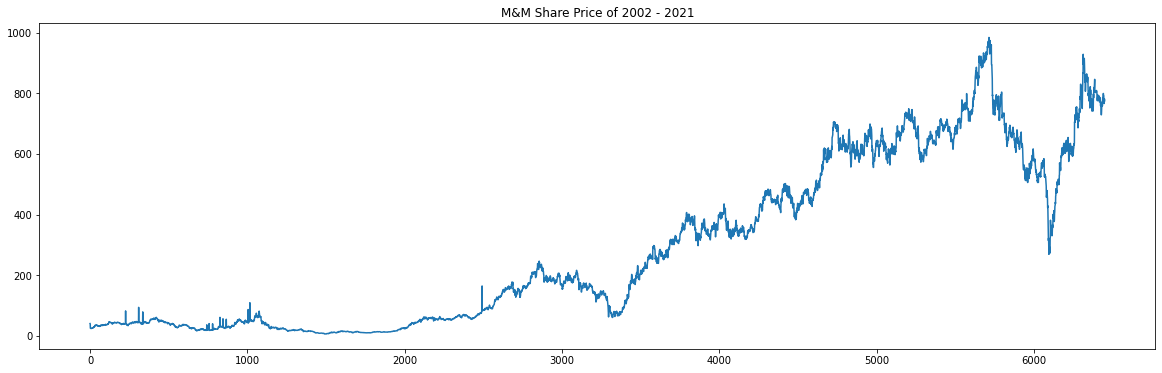

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.title('M&M Share Price of 2002 - 2021')
plt.plot(df1)

In [ ]:
Mahindra.Date = pd.to_datetime(Mahindra.Date)
Mahindra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6450 entries, 0 to 6449
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6450 non-null   datetime64[ns]
 1   Open       6450 non-null   float64       
 2   High       6450 non-null   float64       
 3   Low        6450 non-null   float64       
 4   Close      6450 non-null   float64       
 5   Adj Close  6450 non-null   float64       
 6   Volume     6450 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 352.9 KB


In [ ]:
Mahindra = Mahindra.set_index('Date')

In [ ]:
pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

     \ 306 kB 2.2 MB/s
  Created wheel for mpl-finance: filename=mpl_finance-0.10.1-py3-none-any.whl size=8435 sha256=a1fba5e26a94191835ca85458afb679fd188a6853ed4264c08ff8b4aeef84679
  Stored in directory: /tmp/pip-ephem-wheel-cache-vl0284tu/wheels/eb/17/99/0f3929e635912eb25fc346aaf43b4ee3da4a80dee8ce3d2e4f
Successfully built mpl-finance


In [ ]:
pip install --upgrade mplfinance

     |████████████████████████████████| 62 kB 651 kB/s 


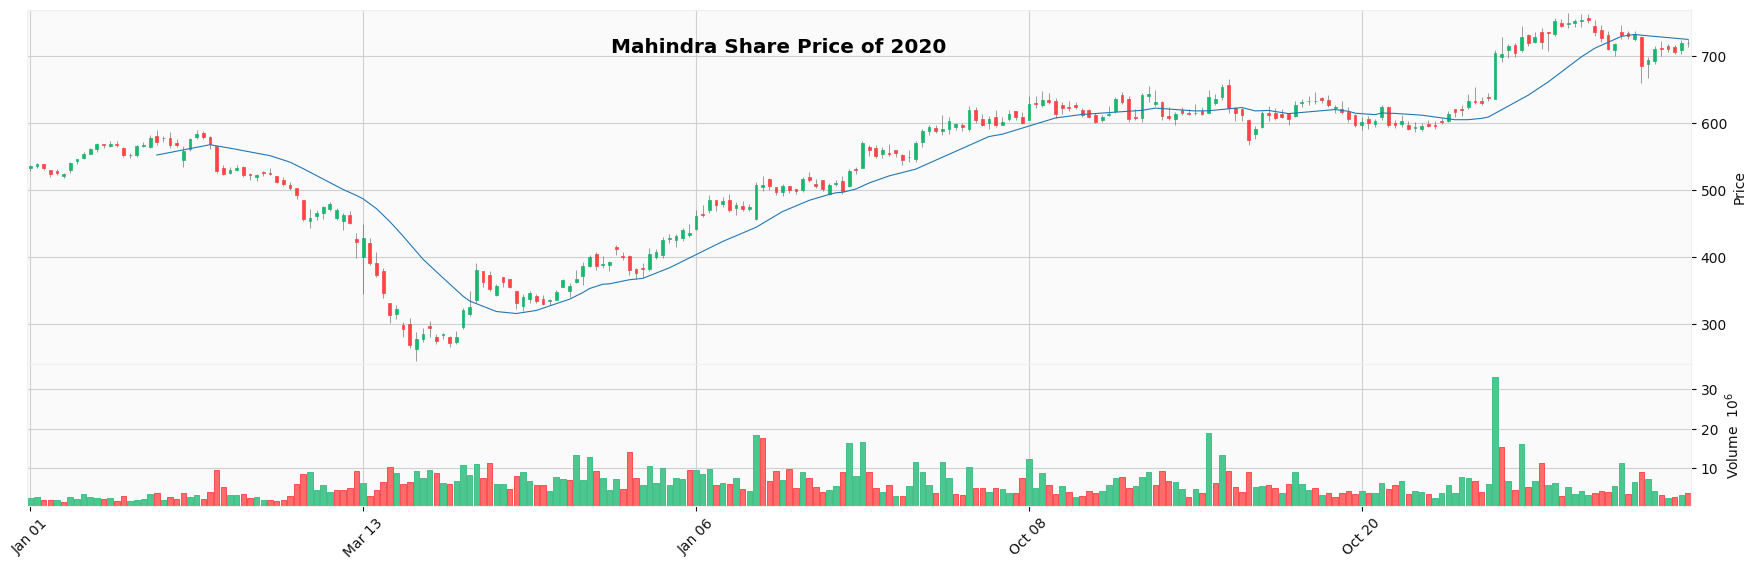

In [ ]:
import mplfinance as mpf
mpf.plot(Mahindra['2020'], 
         type='candle', mav=(20), 
         volume=True, 
         title = 'Mahindra Share Price of 2020', 
         figratio=(20,6), tight_layout = True, 
         style = 'yahoo')

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.03508761],
       [0.0344929 ],
       [0.01959969],
       ...,
       [0.7832971 ],
       [0.79286358],
       [0.7864689 ]])

In [ ]:
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size, test_size

(4837, 1613)

In [ ]:
len(train_data), len(test_data)

(4837, 1613)

In [ ]:
import numpy 
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range (len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(X_train)

[[0.03508761 0.0344929  0.01959969 ... 0.03080957 0.03271518 0.03218443]
 [0.0344929  0.01959969 0.01946541 ... 0.03271518 0.03218443 0.03068168]
 [0.01959969 0.01946541 0.01959969 ... 0.03218443 0.03068168 0.0306433 ]
 ...
 [0.71507867 0.71377413 0.70699577 ... 0.64056785 0.62834121 0.60685509]
 [0.71377413 0.70699577 0.71162555 ... 0.62834121 0.60685509 0.61286609]
 [0.70699577 0.71162555 0.70185449 ... 0.60685509 0.61286609 0.59687939]]


In [ ]:
print(X_train.shape), print(y_train.shape)

(4736, 100)
(4736,)


(None, None)

In [ ]:
print(X_test.shape), print(y_test.shape)

(1512, 100)
(1512,)


(None, None)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
74/74 [==============================] - 19s 191ms/step - loss: 0.0038 - val_loss: 0.0023
Epoch 2/100
74/74 [==============================] - 12s 165ms/step - loss: 1.9316e-04 - val_loss: 0.0018
Epoch 3/100
74/74 [==============================] - 12s 163ms/step - loss: 1.8861e-04 - val_loss: 0.0014
Epoch 4/100
74/74 [==============================] - 12s 165ms/step - loss: 1.8988e-04 - val_loss: 0.0013
Epoch 5/100
74/74 [==============================] - 12s 166ms/step - loss: 1.6744e-04 - val_loss: 0.0014
Epoch 6/100
74/74 [==============================] - 12s 169ms/step - loss: 1.6339e-04 - val_loss: 0.0014
Epoch 7/100
74/74 [==============================] - 13s 172ms/step - loss: 1.8278e-04 - val_loss: 0.0023
Epoch 8/100
74/74 [==============================] - 12s 166ms/step - loss: 1.6724e-04 - val_loss: 9.6567e-04
Epoch 9/100
74/74 [==============================] - 12s 163ms/step - loss: 1.3934e-04 - val_loss: 9.8071e-04
Epoch 10/100
74/74 [======================

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

238.98977224555608

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

680.9154617352846

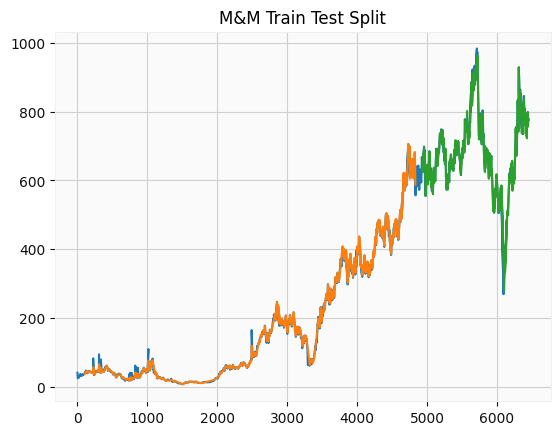

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title('M&M Train Test Split')
plt.show()

In [ ]:
len(test_data)

1613

In [ ]:
x_input=test_data[1513:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.7773676]
101
1 day input [0.79255659 0.80810846 0.80693188 0.80283928 0.76227141 0.82340455
 0.81711216 0.83404532 0.80672724 0.82330226 0.81158719 0.78928256
 0.79194272 0.78979414 0.79357974 0.78590612 0.7633457  0.76375499
 0.75168184 0.75822996 0.75807652 0.7785395  0.79189158 0.78733855
 0.77066124 0.75203992 0.76436885 0.80954089 0.79634225 0.81521936
 0.83128281 0.82212561 0.82340455 0.83358489 0.84115615 0.85880547
 0.82002817 0.81833995 0.81823766 0.81399157 0.81660058 0.81583322
 0.81992582 0.81644715 0.81900502 0.82110246 0.81951659 0.82069318
 0.81818651 0.81772608 0.79301702 0.78820821 0.78652005 0.7934263
 0.80350429 0.80601102 0.80524366 0.79306816 0.78907792 0.79086843
 0.79409131 0.80345315 0.79337516 0.79030571 0.78759434 0.78278553
 0.78411561 0.79260779 0.79772354 0.79132886 0.79122651 0.78713391
 0.77117282 0.76938231 0.77526541 0.76513621 0.75618366 0.73894363
 0.74175729 0.75367693 0.76861494 0.78206931 0.77736285 0.7703031
 0.76917766 0.78626426 0.79787697 0.

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

6450

Text(0.5, 1.0, 'M&M Prediction of Next 30 Days')

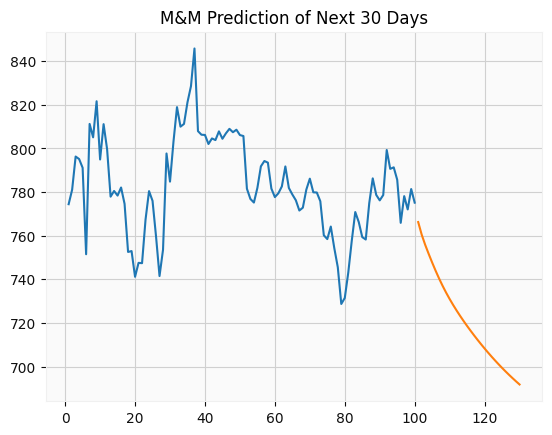

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[6350:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.title('M&M Prediction of Next 30 Days')

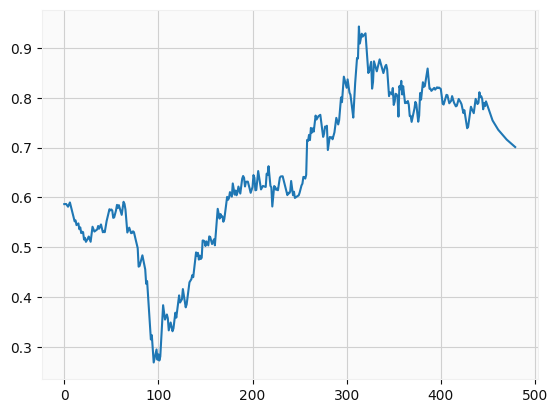

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[6000:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

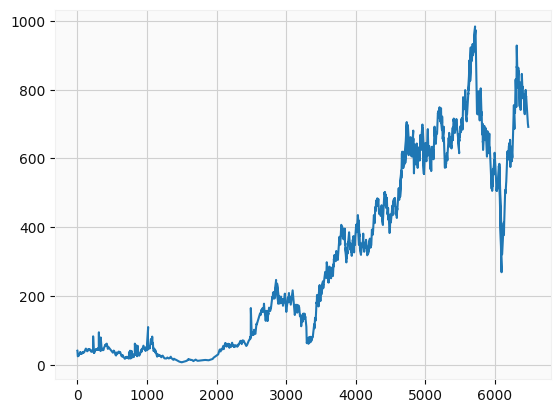

In [ ]:
plt.plot(df3)